***

***
 **EXERCICE EN MINI PROJET**

> En utilisant le même jeu de données sur Google colab


> Vous allez implémenter les deux types d'acritecture historique en Deep Learning 




***

***

# **Mini projet** 

Implementer le modèle **LeNet** et **AlexNet** et faire une comparaison des deux termes de **LOSS** et **Accuracy**.

/!\ Faites attention à la taille des inputs !!!!

## **Bon courage**


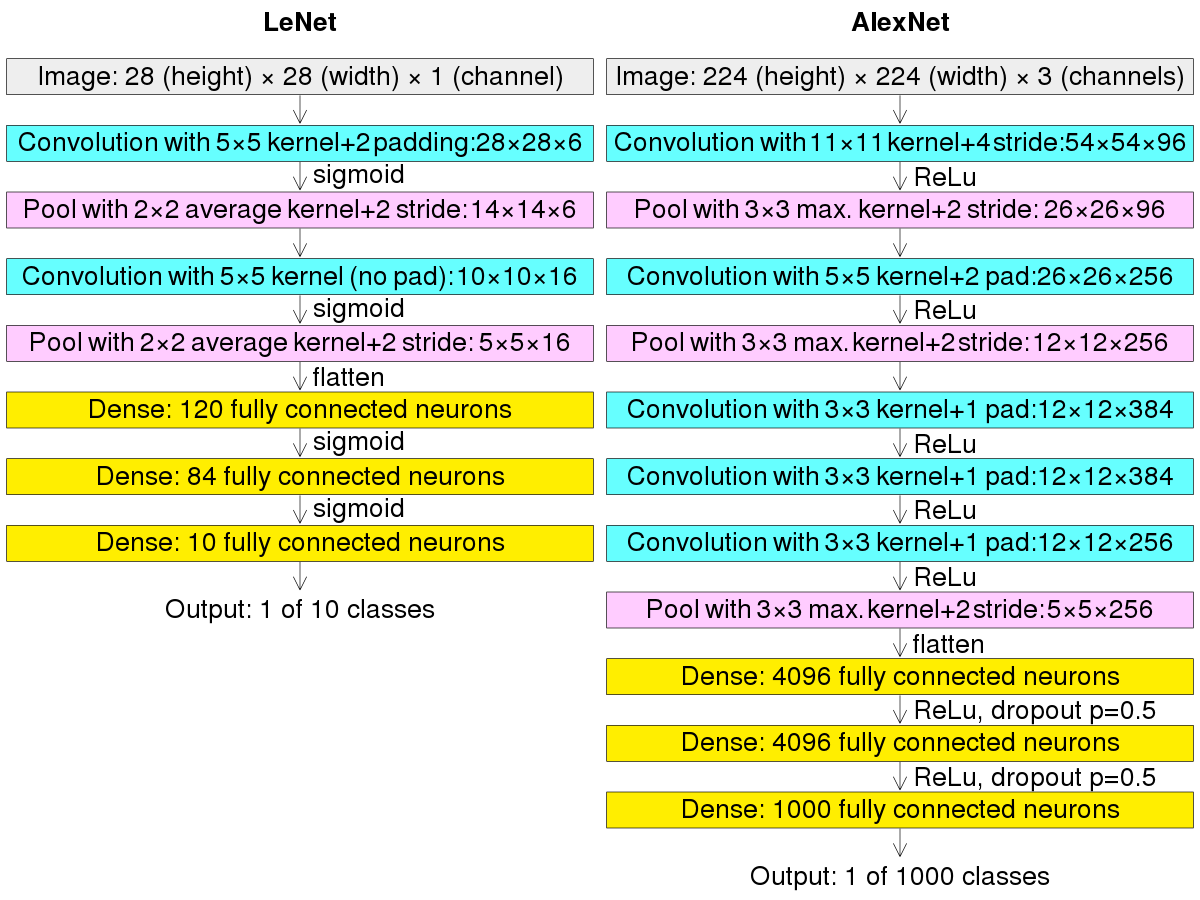


In [1]:
## Importation des librairies de python 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from PIL import Image
import warnings
from PIL import Image
import zipfile
import tensorflow_hub as hub
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
np.random.seed(0)
tf.random.set_seed(0)

# Chargement des données
- Les données consistent en plus de 50000 images de panneaux de signalisation appartenant à 43 classes différentes.
- Le dossier `Meta` contient une image de chaque classe.
- Le dossier `Train` contient plus de 39000 images pour l'entraînement et le dossier `Test` contient environ 12000 images.
- Les fichiers csv contiennent la dimension de l'image, son chemin et le label correspondant.

Vous pouvez trouvez les données dans le site du projet GTSRB ou sur kaggle. 
 ([website](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset), [kaggle](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign))

 # **Cependant le plus simple est de recupérer les données depuis ce lien de Drive que j'ai crée car j'ai déjà converti les images du format d'origne .ppm en .jpeg [Drive datasets by PSW](https://drive.google.com/drive/folders/1t43GSfoWpR68SG8SNgP0A-52kacCS8AI)**

In [ ]:
# ## importation de fichiers CSV depuis votre ordinateur en local  
# from google.colab import files 
# files.upload()

In [ ]:
# ##importation des images: Mata, Train et Test depuis votre ordinateur en local 
%%time
# from zipfile import ZipFile
# file_name = files.upload()

In [101]:
# #importation des images : train et test
%%time 
# from zipfile import ZipFile
# file_name = files.upload()

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 15 µs


In [2]:
# depuis google drive c'est beaucoup plus radie 
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pwd


'/content'

In [5]:
path = '/content'

In [6]:
%%time
with zipfile.ZipFile(path + "/drive/MyDrive/Meta.zip","r") as zip_ref:
        zip_ref.extractall("")
        
with zipfile.ZipFile(path + "/drive/MyDrive/Train.zip","r") as zip_ref:
        zip_ref.extractall("")

with zipfile.ZipFile(path + "/drive/MyDrive/Test.zip","r") as zip_ref:
        zip_ref.extractall("")

CPU times: user 8.79 s, sys: 4.02 s, total: 12.8 s
Wall time: 28.5 s


# **Preparation des données training validation et labels**

In [7]:
path_files = "/content/"

In [8]:
meta = os.listdir(path_files +'Meta')
meta

['23.png',
 '7.png',
 '22.png',
 '39.png',
 '40.png',
 '28.png',
 '8.png',
 '9.png',
 '6.png',
 '1.png',
 '37.png',
 '42.png',
 '26.png',
 '14.png',
 '19.png',
 '18.png',
 '36.png',
 '13.png',
 '16.png',
 '15.png',
 '27.png',
 '24.png',
 '0.png',
 '32.png',
 '20.png',
 '33.png',
 '5.png',
 '38.png',
 '34.png',
 '2.png',
 '3.png',
 '11.png',
 '21.png',
 '10.png',
 '25.png',
 '31.png',
 '12.png',
 '29.png',
 '35.png',
 '30.png',
 '41.png',
 '4.png',
 '17.png']

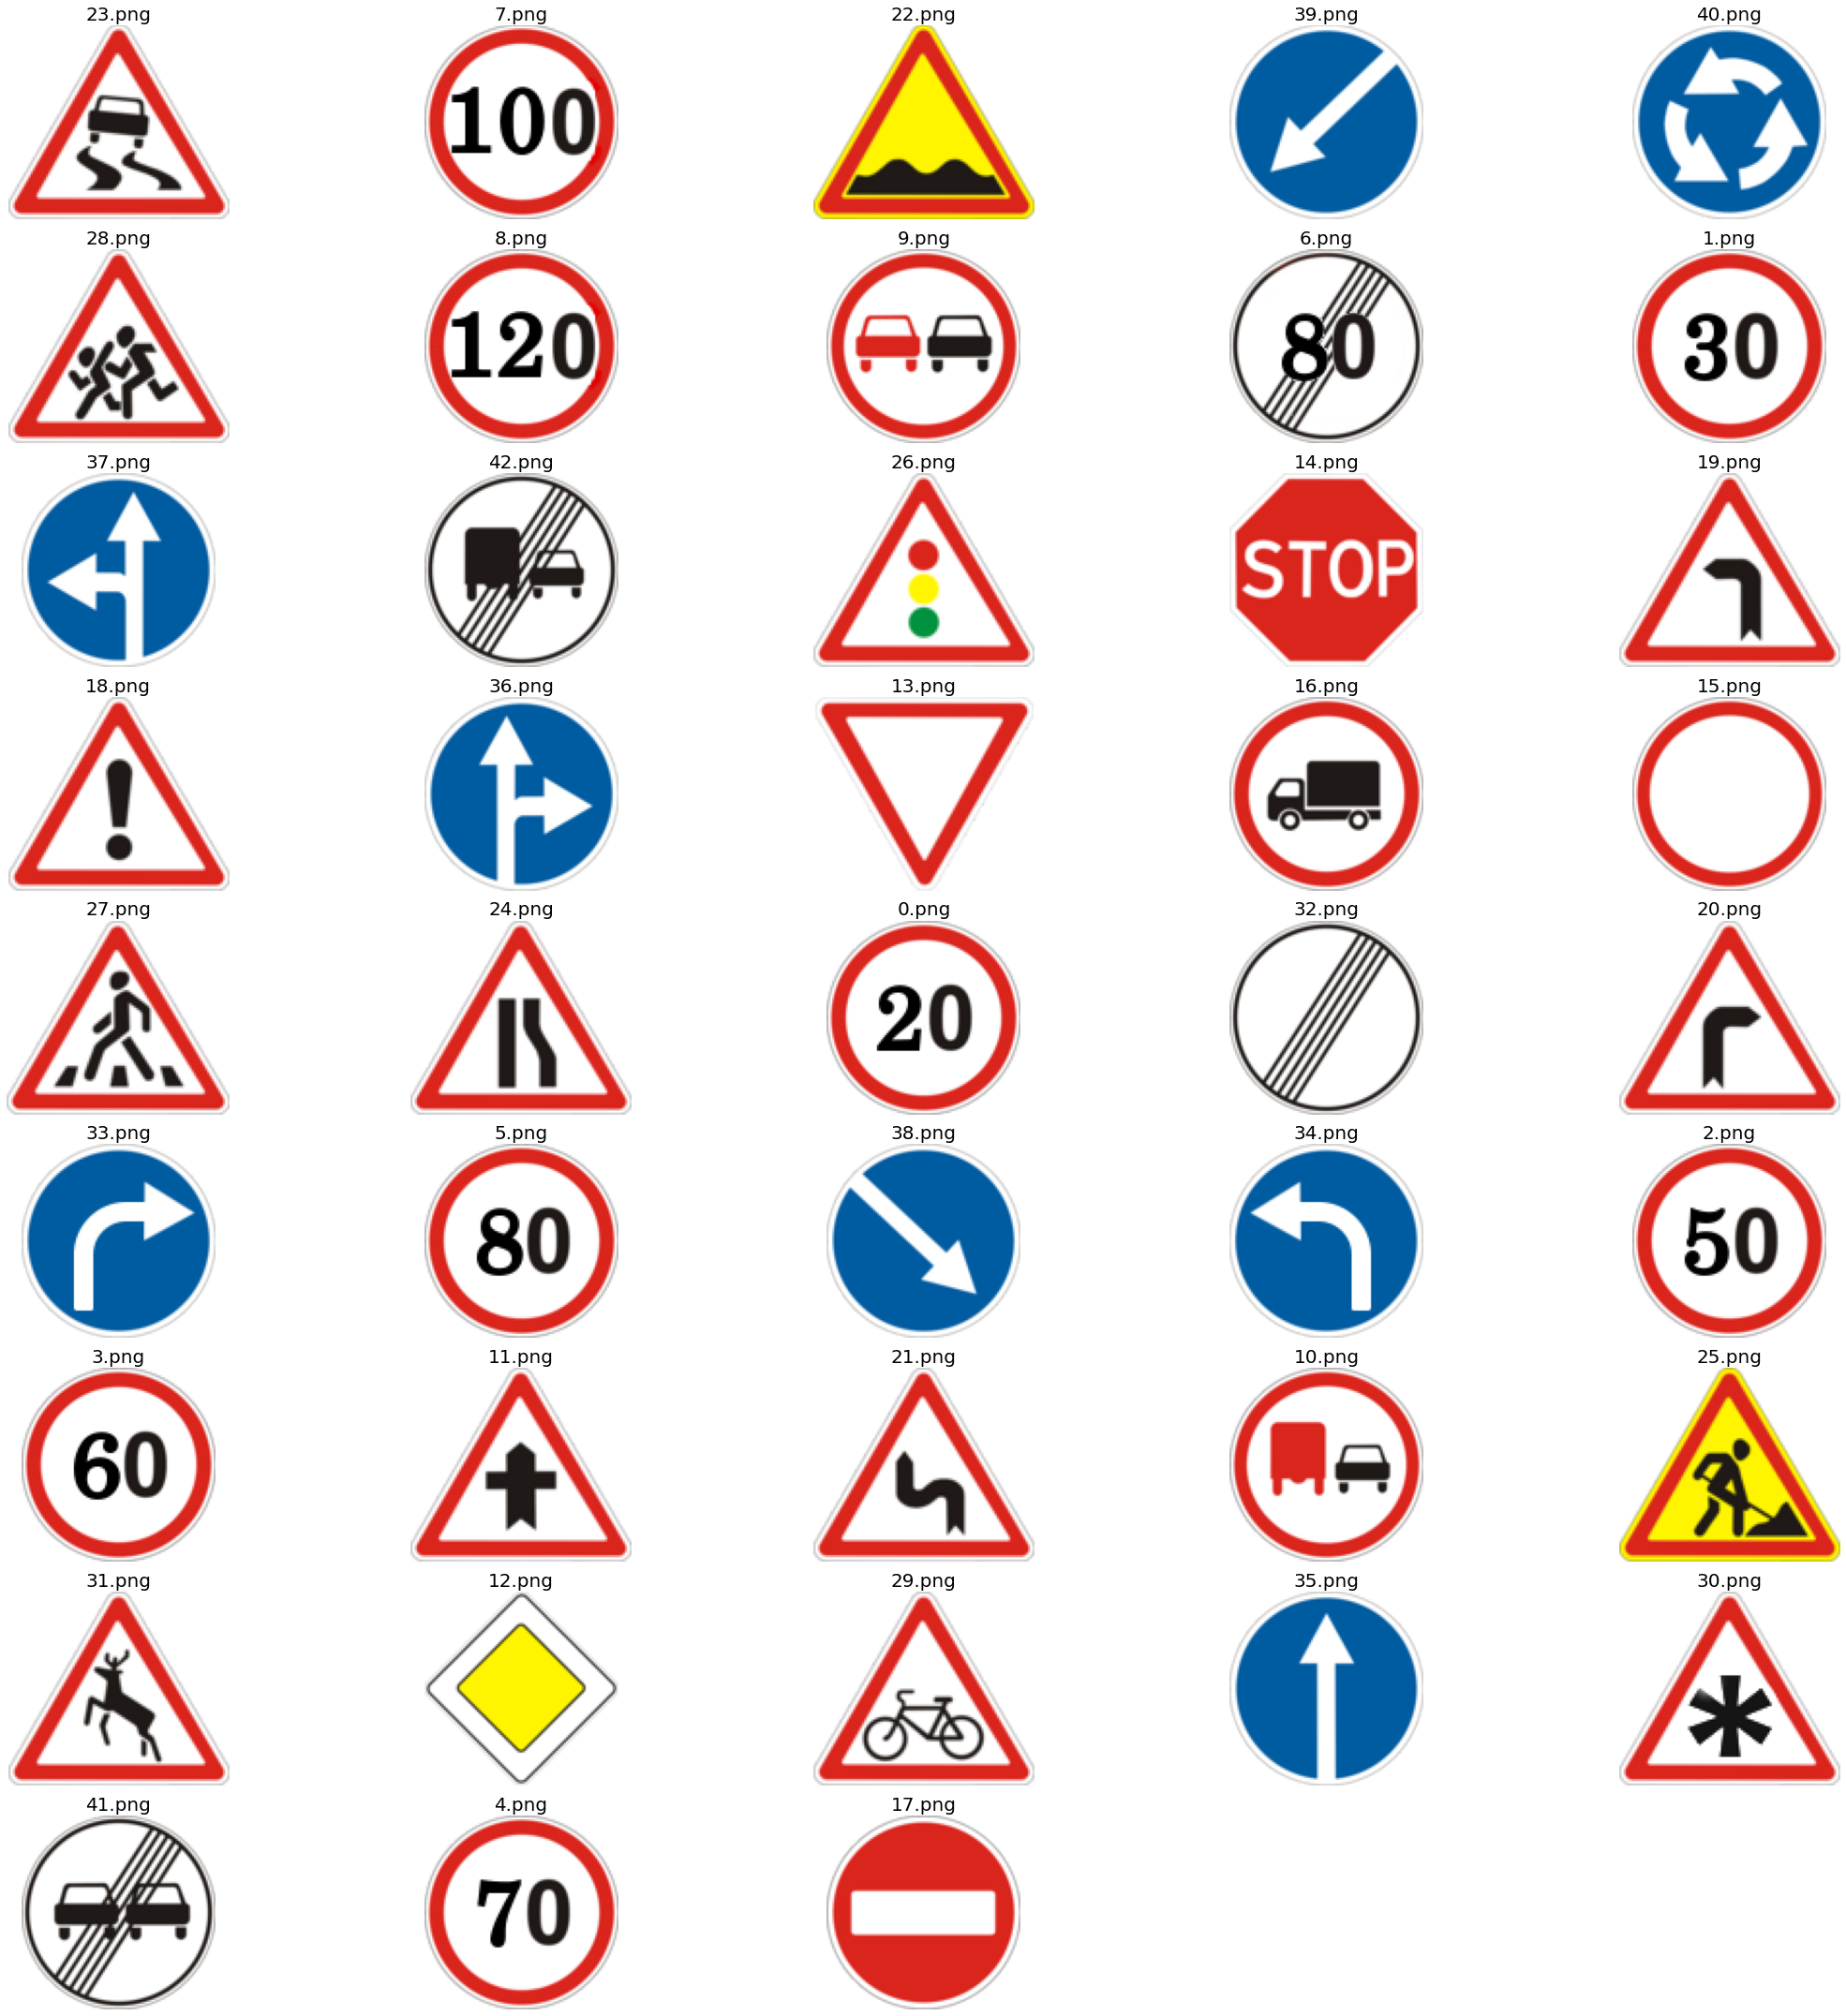

In [9]:
## Viewing images belonging to each class

plt.figure(figsize=(30,30))
for i, file in enumerate(meta):
    img = Image.open(path_files+'Meta/'+file)
    ax = plt.subplot(9,5,i+1)
    ax.imshow(img)
    ax.set_title(file, size=20)
    plt.axis('off')
plt.tight_layout()

In [10]:
## Creating a dictionary for class labels

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
%pwd

'/content'

In [13]:
train_df = pd.read_csv(path + "/drive/MyDrive/Train.csv")
train_df.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png

In [14]:
train_df.describe()

Width        Height        Roi.X1        Roi.Y1        Roi.X2  \
count  39209.000000  39209.000000  39209.000000  39209.000000  39209.000000   
mean      50.835880     50.328930      5.999515      5.962381     45.197302   
std       24.306933     23.115423      1.475493      1.385440     23.060157   
min       25.000000     25.000000      0.000000      5.000000     20.000000   
25%       35.000000     35.000000      5.000000      5.000000     29.000000   
50%       43.000000     43.000000      6.000000      6.000000     38.000000   
75%       58.000000     58.000000      6.000000      6.000000     53.000000   
max      243.000000    225.000000     20.000000     20.000000    223.000000   

             Roi.Y2       ClassId  
count  39209.000000  39209.000000  
mean      44.728379     15.788390  
std       21.971145     12.013238  
min       20.000000      0.000000  
25%       30.000000      5.000000  
50%       38.000000     12.000000  
75%       52.000000     25.000000  
max      205.000000     42.000000

# Prétraitement
- Les dimensions moyennes de toutes les images sont d'environ 50x50 pixels.
- Toutes les images sont redimensionnées à (50,50) pixels et sauvegardées comme tableau numpy.
- Les données sont normalisées et les étiquettes sont encodées en One Hot.

In [16]:
print(f'minimum width: {train_df.Width.min()}')
print(f'minimum height: {train_df.Height.min()}')
print(f'average width: {train_df.Width.mean()}')
print(f'average height: {train_df.Height.mean()}')

minimum width: 25
minimum height: 25
average width: 50.83587951745773
average height: 50.328929582493814


In [19]:
train_x =[]
for i in train_df.Path:
    img = Image.open(path_files+i)       # reading image
    img = img.resize((50,50))     # reasizing image
    train_x.append(np.array(img)) # saving image as array to train

train_y = np.array(train_df.ClassId)
train_x = np.array(train_x)
print(train_x.shape)
print(train_y.shape)

(39209, 50, 50, 3)
(39209,)


In [21]:
test_df = pd.read_csv(path + "/drive/MyDrive/Test.csv")
test_df.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png

In [22]:
test_x =[]
for i in test_df.Path:
    img = Image.open(path_files+i)
    img = img.resize((50,50))
    test_x.append(np.array(img))

test_y = np.array(test_df.ClassId)
test_x = np.array(test_x)
print(test_x.shape)
print(test_y.shape)

(12630, 50, 50, 3)
(12630,)


Dangerous curve right


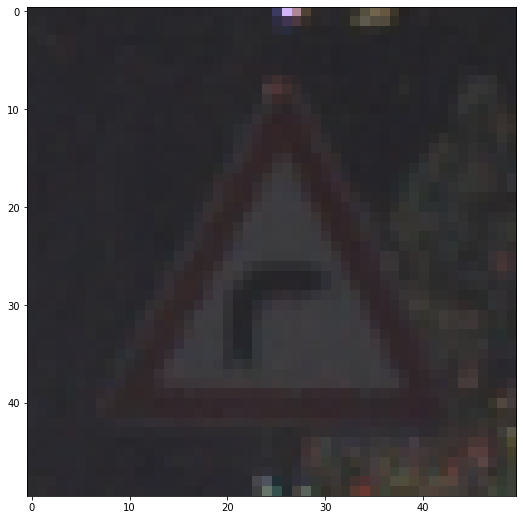

In [39]:
print(classes[train_y[20]])
plt.imshow(train_x[20])
#plt.axis('off')
plt.show()

In [35]:
## Normalization

xtrain = train_x/255
xtest = test_x/255


# One Hot encoding

ytrain = keras.utils.to_categorical(train_y)
ytest = keras.utils.to_categorical(test_y)

# Création d'un modèle CNN
- Les données sont divisées en données de formation et de validation
- Le modèle CNN contient deux blocs, chacun contenant deux couches convolutionnelles connectées à une couche de mise en commun Max.
- Celle-ci est ensuite connectée à un CNN entièrement connecté avec des couches de dropout entre les deux.
- Le modèle est compilé avec un optimiseur SGD et une fonction de perte sous forme d'entropie croisée catégorique.


In [34]:
## Splitting into train and validation data

from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)
print(xtrain.shape)
print(xvalid.shape)
print(ytrain.shape)
print(yvalid.shape)

(25093, 50, 50, 3)
(6274, 50, 50, 3)
(25093, 43)
(6274, 43)


In [27]:
BATCH_SIZE = 32
steps_per_epoch = 31367//BATCH_SIZE  # len(xtrain)

Tensorflow version 2.8.0


In [28]:
# padding= 'valid', strides=1  par defaut 
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
#premier couche de convolution avec un dropout de 20 %
model = keras.models.Sequential()
model.add(Conv2D(filters=42, kernel_size= (5,5), strides=2, activation='relu', padding='same', input_shape=(50,50,3)))
model.add(Conv2D(filters=42, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2)) # 20 % désactiver 

#deuxiement 
model.add(Conv2D(filters=94, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(Conv2D(filters=94, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2))

# DNN 
model.add(Flatten())
model.add(Dense(300, activation='relu')) # max(x,0)
model.add(Dense(400, activation='relu'))
# couche sortie 
model.add(Dense(43, activation='softmax'))

# utility callback that displays training curves
#plot_training = PlotTraining(sample_rate=10, zoom=1)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 42)        3192      
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 42)        44142     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 42)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 6, 6, 42)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 94)          98794     
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 94)          220994    
                                                        

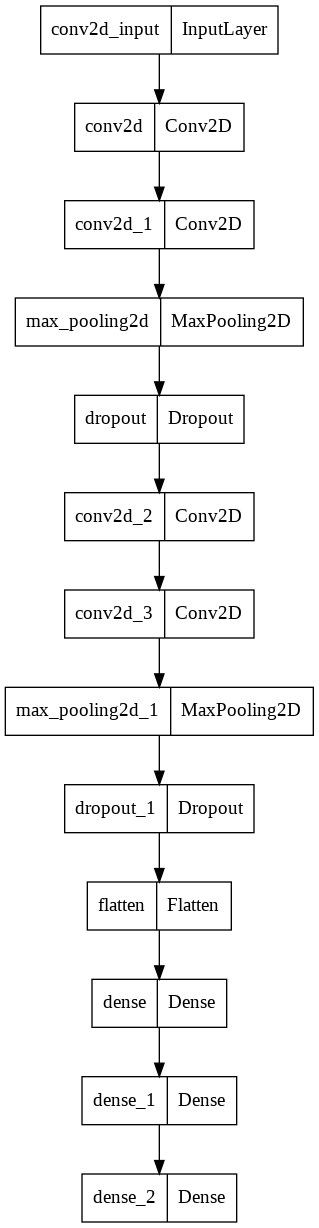

In [53]:
keras.utils.plot_model(model)

In [30]:
# Compiling the CNN model
model.compile(optimizer='sgd',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [31]:
## Fitting the model, with early stopping callback
%%time
earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights =True)
model_history = model.fit(xtrain,ytrain, epochs=50,
                         validation_data=(xvalid,yvalid),
                         callbacks=[earlystop_cb])
                        

Epoch 1/50
981/981 [==============================] - 23s 14ms/step - loss: 3.5466 - accuracy: 0.0623 - val_loss: 3.4608 - val_accuracy: 0.0990
Epoch 2/50
981/981 [==============================] - 14s 14ms/step - loss: 3.2920 - accuracy: 0.1336 - val_loss: 2.8319 - val_accuracy: 0.2433
Epoch 3/50
981/981 [==============================] - 13s 13ms/step - loss: 2.1826 - accuracy: 0.3775 - val_loss: 1.5078 - val_accuracy: 0.5474
Epoch 4/50
981/981 [==============================] - 14s 14ms/step - loss: 1.2209 - accuracy: 0.6229 - val_loss: 0.7554 - val_accuracy: 0.7665
Epoch 5/50
981/981 [==============================] - 13s 13ms/step - loss: 0.8068 - accuracy: 0.7435 - val_loss: 0.5347 - val_accuracy: 0.8249
Epoch 6/50
981/981 [==============================] - 13s 13ms/step - loss: 0.6010 - accuracy: 0.8094 - val_loss: 0.4926 - val_accuracy: 0.8577
Epoch 7/50
981/981 [==============================] - 14s 14ms/step - loss: 0.4815 - accuracy: 0.8464 - val_loss: 0.3121 - val_accuracy:

In [32]:
# model save 
model.save('model_mini_projrt.h5')

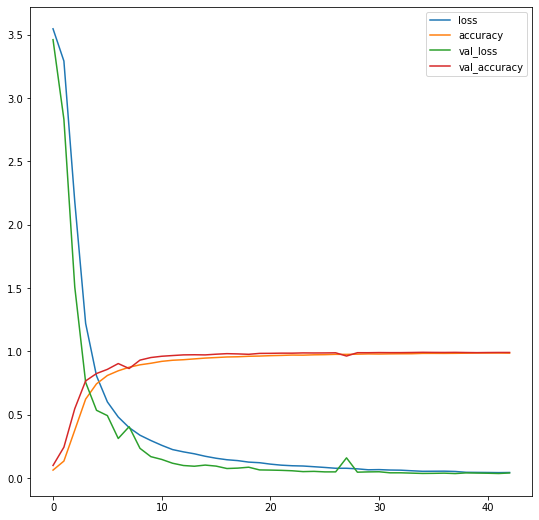

In [33]:
pd.DataFrame(model_history.history).plot()

#Evaluation et Prédiction model 

In [50]:
## Évaluation du modèle

loss, accuracy = model.evaluate(xtest,ytest)
print(f'Loss = {loss:.2f}\naccuracy = {accuracy*100:.2f}%')

395/395 [==============================] - 3s 8ms/step - loss: 0.3985 - accuracy: 0.9130
Loss = 0.40
accuracy = 91.30%


In [51]:
## Prédiction du model

prob = model.predict(xtest)
pred = np.argmax(prob, axis=-1)


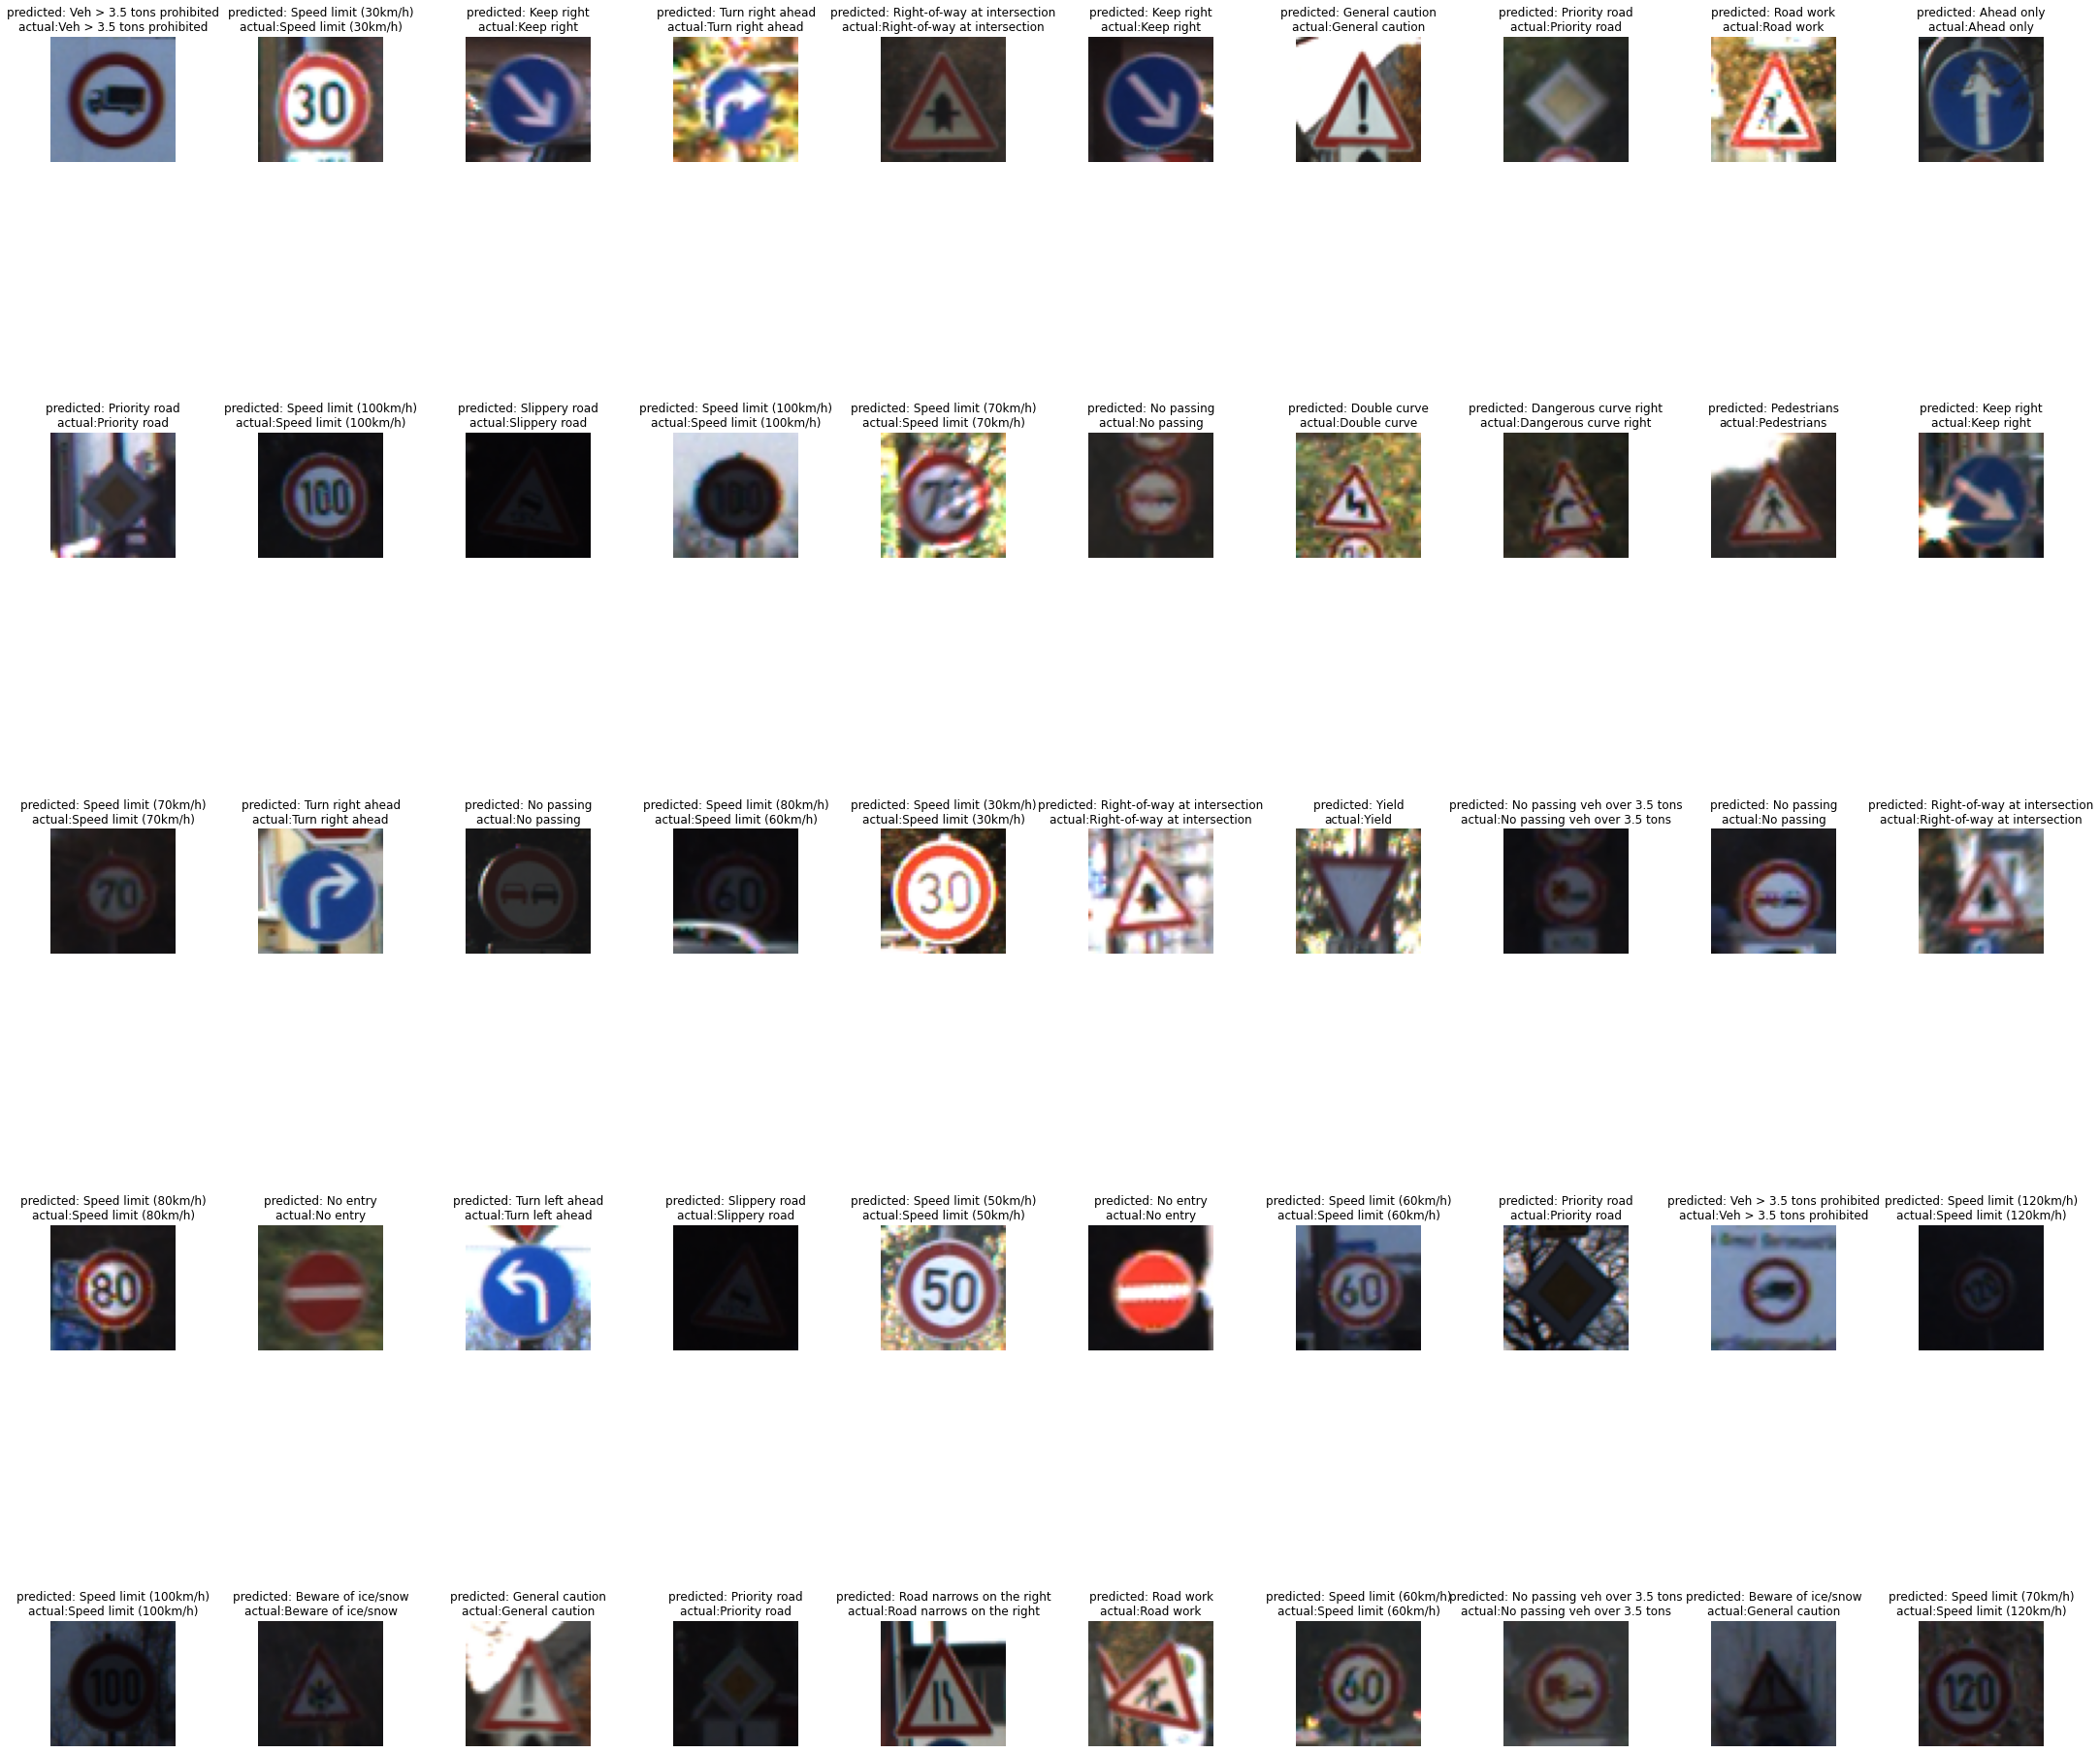

In [102]:

plt.figure(figsize=(30,30))
for i in range(50):
    ax = plt.subplot(5,10,i+1)
    ax.imshow(xtest[i])
    ax.set_title(f'predicted: {classes[pred[i]]}\nactual:{classes[test_y[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Un 2ème Modèle sans padding**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D,BatchNormalization

In [45]:
model2 = Sequential([
    Conv2D(42, (5,5), activation='relu', input_shape=(50,50,3)),
    Conv2D(42, (5,5)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPool2D(2,2),
    Dropout(0.2),
    Conv2D(94, (5,5), activation='relu'),
    Conv2D(94, (5,5)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPool2D(2,2),
    #Dropout(0.2),
    Flatten(),
    Dense(400),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dropout(0.3),
    Dense(43, activation='softmax')
])
model2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 42)        3192      
                                                                 
 conv2d_13 (Conv2D)          (None, 42, 42, 42)        44142     
                                                                 
 batch_normalization_6 (Batc  (None, 42, 42, 42)       168       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 42, 42, 42)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 21, 21, 42)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 21, 21, 42)       

In [46]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [47]:
epochs = 15
history = model2.fit(
    xtrain,
    ytrain,
    batch_size= BATCH_SIZE,
    epochs=epochs,
    validation_data=(xvalid,yvalid)
 
)

Epoch 1/15
1226/1226 [==============================] - 42s 33ms/step - loss: 0.2520 - acc: 0.9363 - val_loss: 0.0536 - val_acc: 0.9884
Epoch 2/15
1226/1226 [==============================] - 40s 32ms/step - loss: 0.0308 - acc: 0.9918 - val_loss: 0.0069 - val_acc: 0.9981
Epoch 3/15
1226/1226 [==============================] - 40s 33ms/step - loss: 0.0188 - acc: 0.9948 - val_loss: 0.0294 - val_acc: 0.9912
Epoch 4/15
1226/1226 [==============================] - 40s 33ms/step - loss: 0.0149 - acc: 0.9955 - val_loss: 0.0033 - val_acc: 0.9992
Epoch 5/15
1226/1226 [==============================] - 40s 33ms/step - loss: 0.0140 - acc: 0.9956 - val_loss: 0.0073 - val_acc: 0.9978
Epoch 6/15
1226/1226 [==============================] - 40s 32ms/step - loss: 0.0086 - acc: 0.9973 - val_loss: 0.0423 - val_acc: 0.9871
Epoch 7/15
1226/1226 [==============================] - 40s 33ms/step - loss: 0.0118 - acc: 0.9965 - val_loss: 0.0029 - val_acc: 0.9994
Epoch 8/15
1226/1226 [==========================

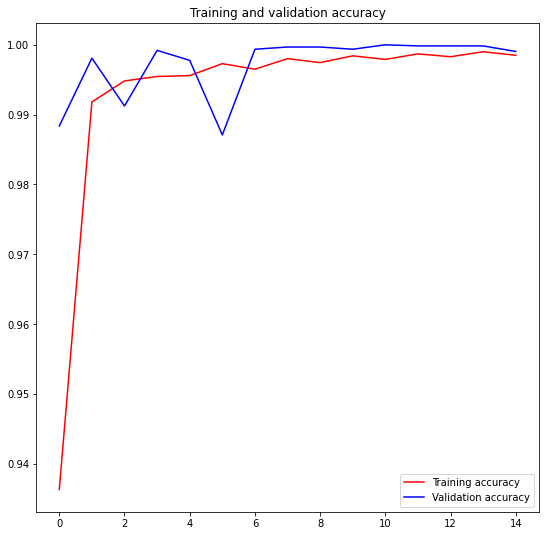

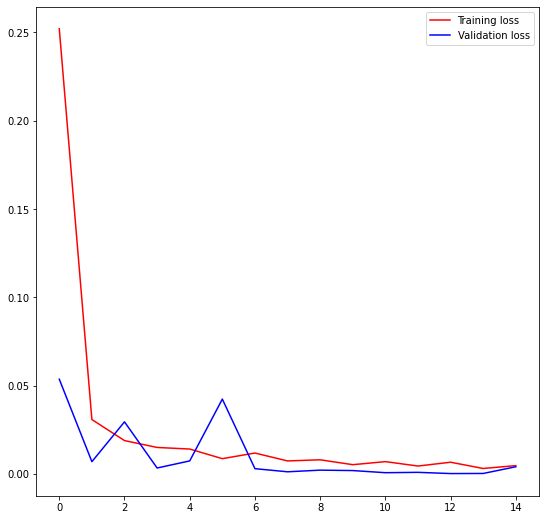

In [48]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.plot(acc, 'r', label='Training accuracy')
plt.plot(val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

In [49]:
loss2, accuracy2 = model2.evaluate(xtest,ytest)
print(f'Loss = {loss2:.2f}\naccuracy = {accuracy2*100:.2f}%')

395/395 [==============================] - 5s 13ms/step - loss: 0.1061 - acc: 0.9771
Loss = 0.11
accuracy = 97.71%


##Model Lenet du jeu de donné Mnist


In [55]:
import numpy as np                   # librairie de maths 
import matplotlib.pyplot as plt      # pour l'affichage 
import random                        # génération de nombre aléatoire

from keras.datasets import mnist     # MNIST dataset dans keras 
from keras.models import Sequential  # Le type de modèle que nous allons utiliser 

from keras.layers.core import Dense, Dropout, Activation # Les types de couches que pour notre modèle 
from keras.utils import np_utils                         # quelques outils de NumPy 


### Pour la convolution 

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv3DTranspose 
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D

In [63]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train= x_train.reshape(-1,28,28,1)
x_test= x_test.reshape(-1,28,28,1)

print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28, 1)
y_train shape (60000,)
x_test shape (10000, 28, 28, 1)
y_test shape (10000,)


In [67]:
## Normalization
print('avant normalisation: Min={}, max={}'.format(x_train.min(), x_train.max()))
x_train = x_train/255
x_test = x_test/255
print('aprés normalisation: Min={}, max={}'.format(x_train.min(), x_train.max()))

# One Hot encoding

ytrain = keras.utils.to_categorical(train_y)
ytest = keras.utils.to_categorical(test_y)

avant normalisation: Min=0, max=255
aprés normalisation: Min=0.0, max=1.0


# Création d'un modèle CNN
- Les données sont divisées en données de formation et de validation
- Le modèle CNN contient deux blocs, chacun contenant une couche convolutionnelle connectée à une couche de mise en commun Max.
- Celle-ci est ensuite connectée à un CNN entièrement connecté avec des couches de dropout entre les deux.
- Le modèle est compilé avec un optimiseur adam et une fonction de perte sous forme d'entropie croisée catégorielle clairsemée.


In [75]:
 from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
#premier couche de convolution avec un dropout de 20 %
model = keras.models.Sequential()
model.add(Conv2D(filters=10, kernel_size= (5,5), strides=2, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2)) # 20 % désactiver 

#deuxiement 
model.add(Conv2D(filters=20, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2))

# DNN 
model.add(Flatten())
model.add(Dense(120, activation='relu')) # max(x,0)
model.add(Dense(84, activation='relu'))
# couche sortie 
model.add(Dense(10, activation='softmax'))

# utility callback that displays training curves
#plot_training = PlotTraining(sample_rate=10, zoom=1)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 14, 14, 10)        260       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 10)         0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 7, 7, 10)          0         
                                                                 
 conv2d_19 (Conv2D)          (None, 4, 4, 20)          5020      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 20)         0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 2, 2, 20)         

In [88]:
# Compiling the CNN model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [89]:
batch_size = 400
epochs = 20
history = model.fit(x_train,y_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_data=(x_test,y_test)
                         )

Epoch 1/20
150/150 [==============================] - 2s 11ms/step - loss: 1.0120 - accuracy: 0.6663 - val_loss: 0.2697 - val_accuracy: 0.9231
Epoch 2/20
150/150 [==============================] - 1s 9ms/step - loss: 0.3730 - accuracy: 0.8815 - val_loss: 0.1747 - val_accuracy: 0.9497
Epoch 3/20
150/150 [==============================] - 1s 9ms/step - loss: 0.2733 - accuracy: 0.9148 - val_loss: 0.1314 - val_accuracy: 0.9612
Epoch 4/20
150/150 [==============================] - 1s 8ms/step - loss: 0.2261 - accuracy: 0.9289 - val_loss: 0.1073 - val_accuracy: 0.9662
Epoch 5/20
150/150 [==============================] - 1s 8ms/step - loss: 0.1983 - accuracy: 0.9383 - val_loss: 0.0912 - val_accuracy: 0.9730
Epoch 6/20
150/150 [==============================] - 1s 9ms/step - loss: 0.1773 - accuracy: 0.9442 - val_loss: 0.0789 - val_accuracy: 0.9742
Epoch 7/20
150/150 [==============================] - 1s 8ms/step - loss: 0.1611 - accuracy: 0.9499 - val_loss: 0.0709 - val_accuracy: 0.9780
Epoch

In [98]:
 #Évaluation du modèle

score= model.evaluate(x_test,y_test, verbose=0)
print(f'test_loss = {score[0]:4.4f}')
print(f'test_accuracy = {score[1]:4.4f}')

test_loss = 0.0406
test_accuracy = 0.9873


In [99]:
model.save('lenet.h5')

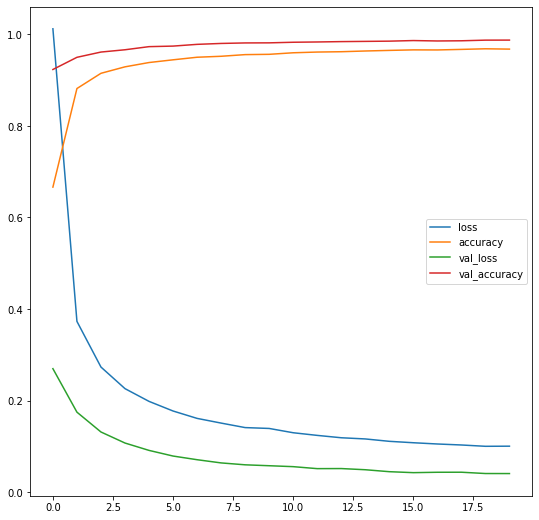

In [100]:
pd.DataFrame(history.history).plot()


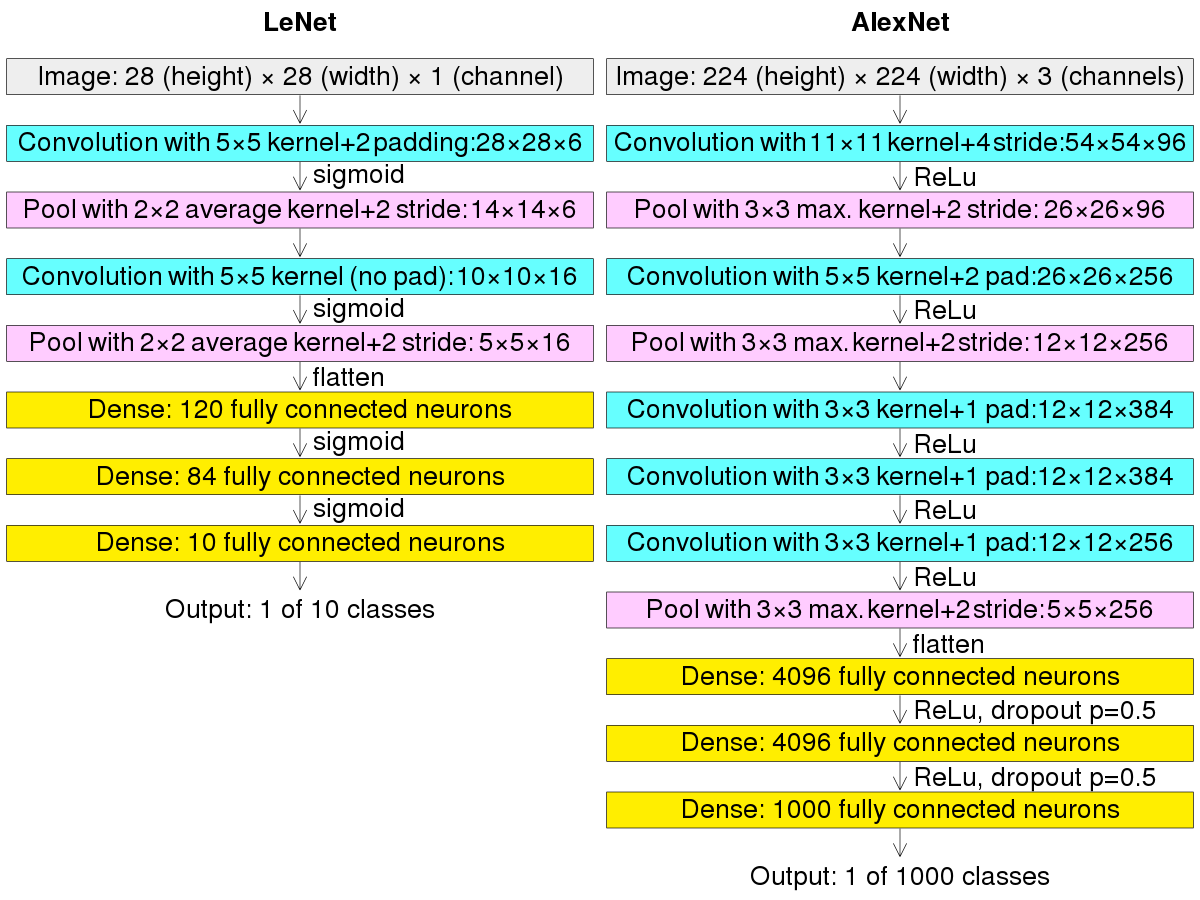
